# Travel Insurance
---

## Business Understanding
Insurance companies face the challenge of managing risk while providing fair and reliable travel insurance products. One of the key difficulties is predicting whether a policyholder will make a claim during their trip. Since most customers do not file claims, the data is highly imbalanced, making it harder to identify the minority of cases where claims actually occur.

Machine learning provides a data-driven solution to this challenge. By analyzing customer demographics, travel details (such as duration and destination), and policy information (such as agency and product type), a predictive model can be developed to estimate the likelihood of a claim. Such a model can help insurers optimize risk assessment, improve resource allocation for claims processing, and design better travel insurance offerings.

The objective of this project is to build and evaluate machine learning models to predict whether a travel insurance policyholder will make a claim (Claim = 1) or not (Claim = 0). Given the imbalanced nature of the dataset, model performance will be assessed using metrics to identify true claim cases.


---
## Project Summary  

| Aspect          | Description |
|-----------------|-------------|
| **Objective**   | Predict whether a customer will **make a travel insurance claim** |
| **Problem Type**| Classification (Target = `Claim` → 0 = No Claim, 1 = Claim) |

---

## Data Understanding 

---

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('data_travel_insurance.csv')
df.head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


#### Column Definition

- Agency               : Name of agency.
- Agency Type          : Type of travel insurance agencies.
- Distribution Channel : Channel of travel insurance agencies.
- Product Name         : Name of the travel insurance products.
- Gender               : Gender of insured.
- Duration             : Duration of travel.
- Destination          : Destination of travel.
- Net Sales            : Amount of sales of travel insurance policies.
- Commission (in value): Commission received for travel insurance agency.
- Age                  : Age of insured.
- Claim                : Claim status.

---

In [24]:
pd.reset_option('display.max_rows')

## Preparation

## Exploratory Data Analysis 
---

### Univariate Analysis
---

#### Numerical Variables

In [29]:
# Numerical Columns #
num_cols = df.describe().columns
num_cols

Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object')

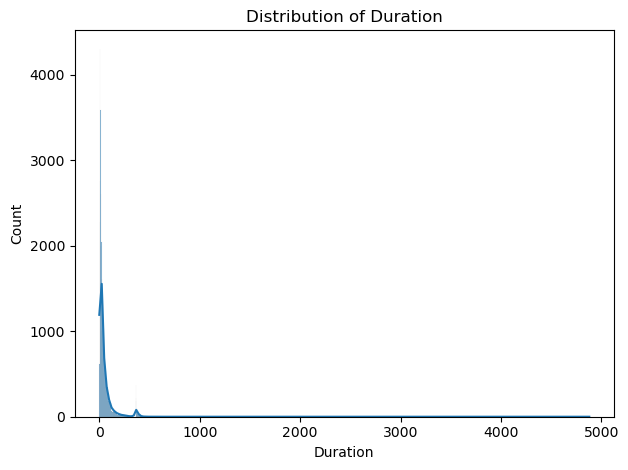

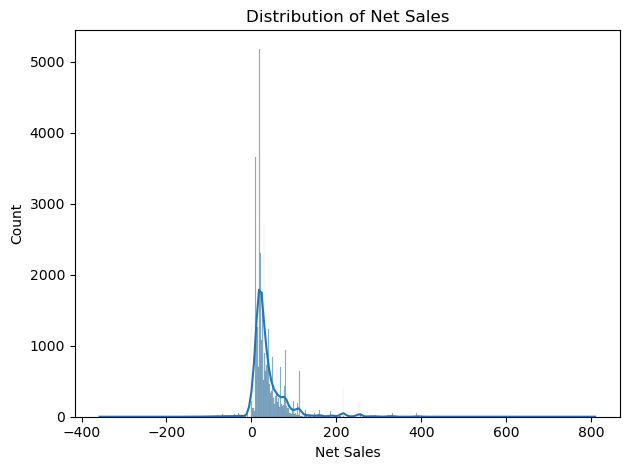

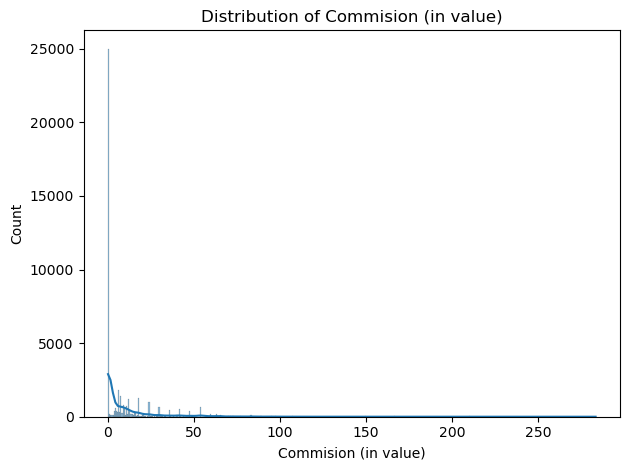

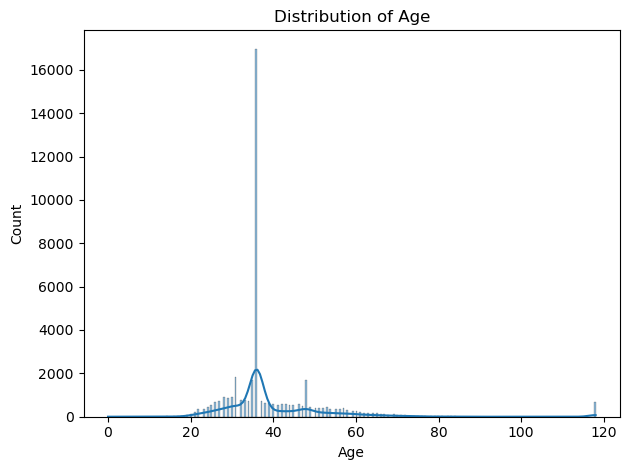

In [30]:
# Plot Distribution of Numerical Variables #
for i in num_cols:
    sns.histplot(df[i], kde = True)
    plt.title(f'Distribution of {i}')
    plt.tight_layout()
    plt.show()

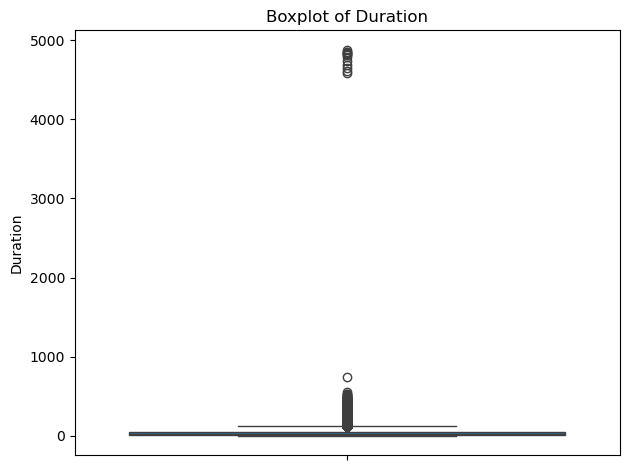

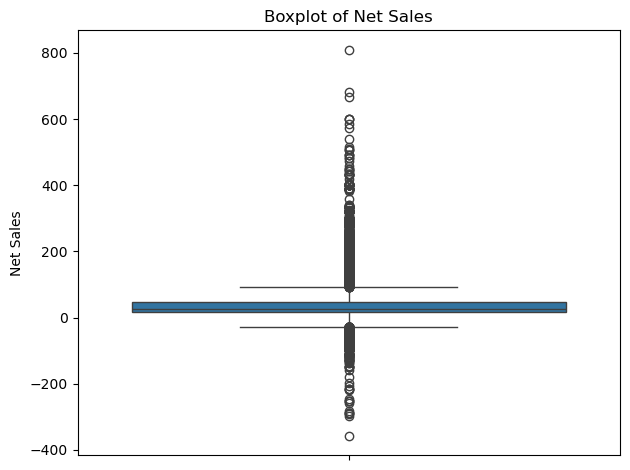

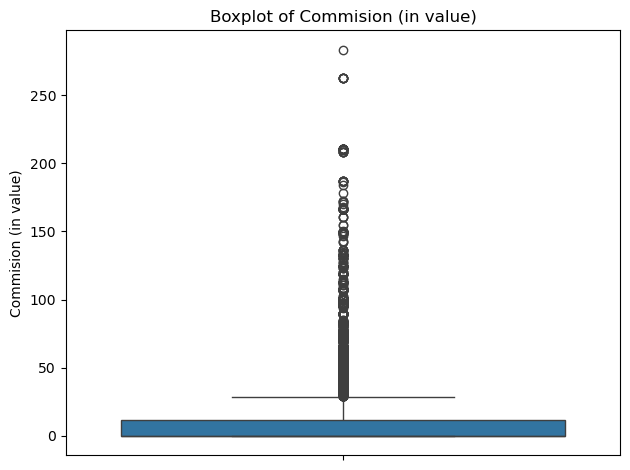

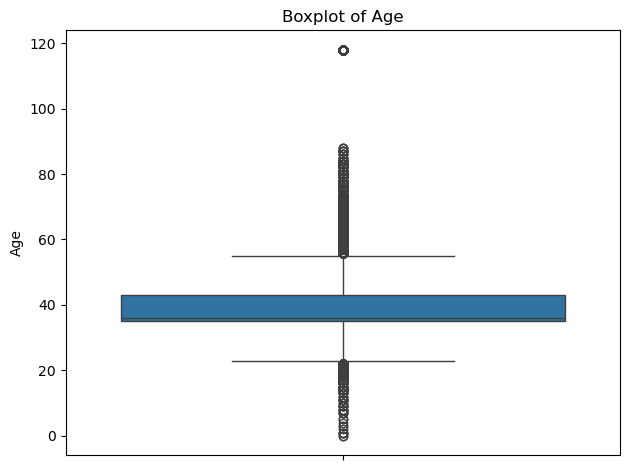

In [31]:
for i in num_cols:
    sns.boxplot(df[i])
    plt.title(f'Boxplot of {i}')
    plt.tight_layout()
    plt.show()

#### Categorical Variables

In [33]:
cat_cols = df.describe(include = 'object').columns
cat_cols

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Gender', 'Destination', 'Claim'],
      dtype='object')

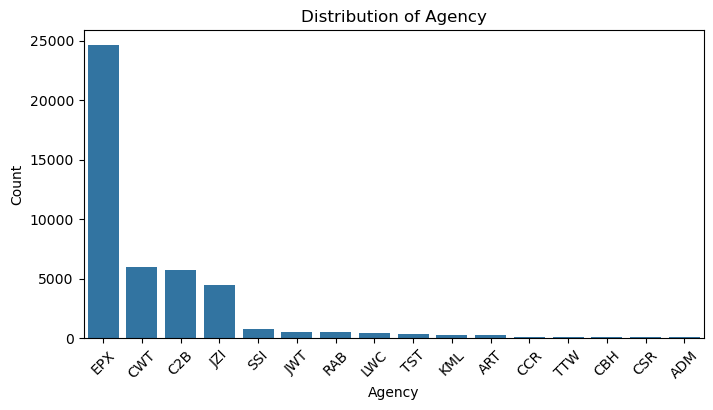

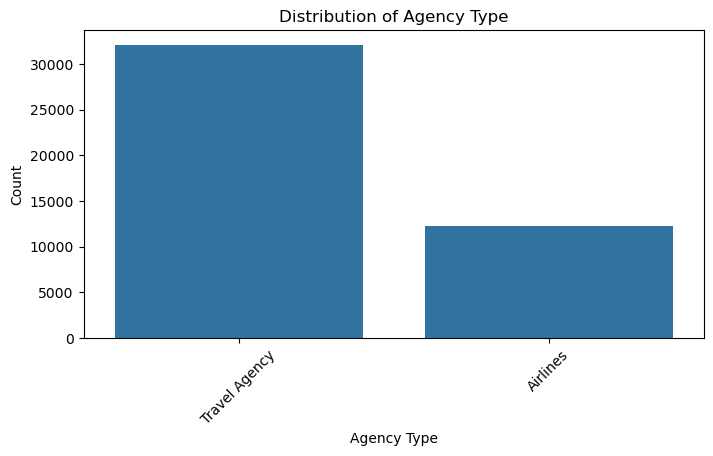

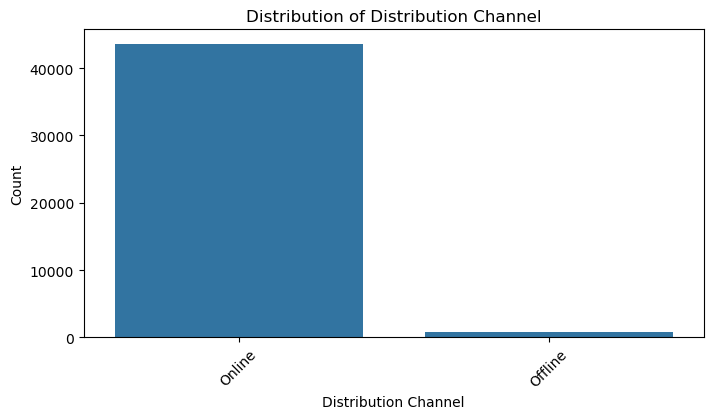

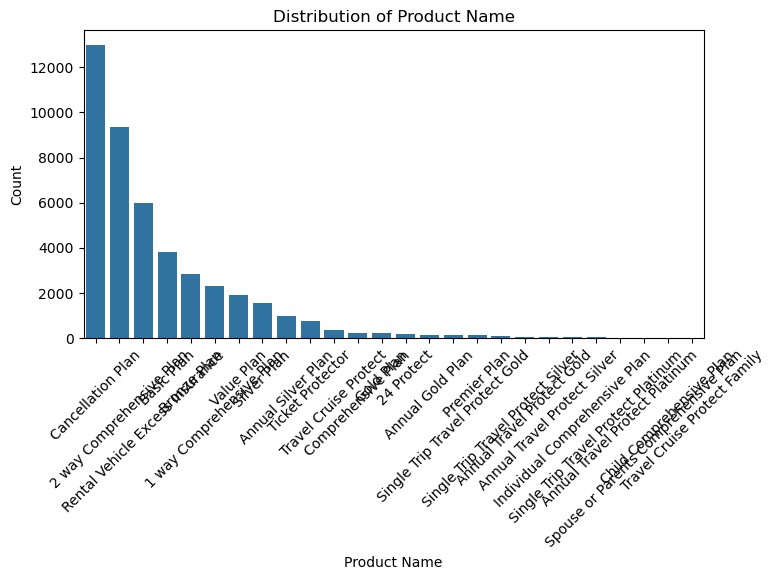

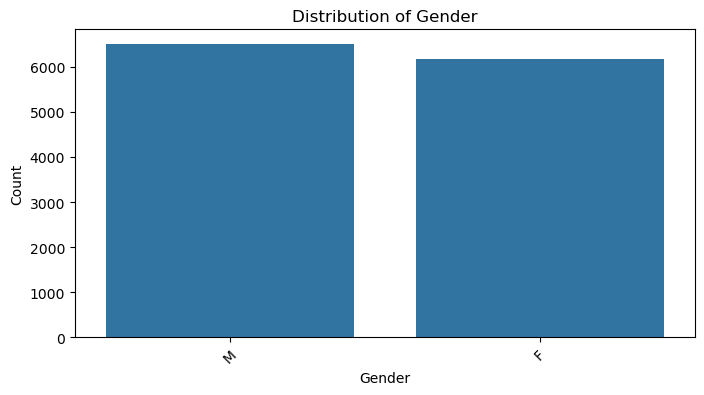

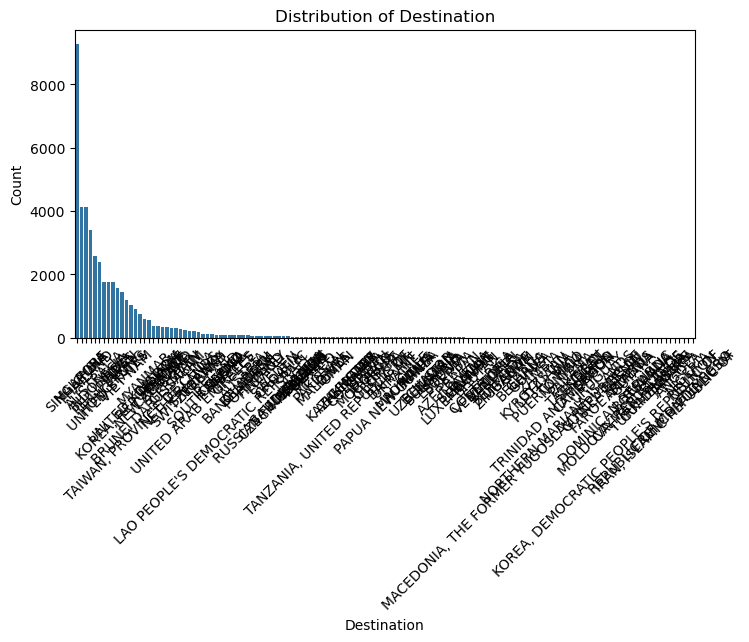

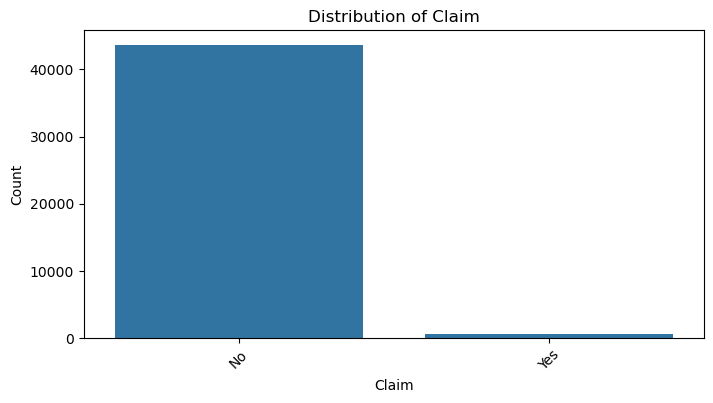

In [34]:
import seaborn as sns

for i in cat_cols:
    plt.figure(figsize=(8,4))
    value_counts = df[i].value_counts()
    #if len(value_counts) > 10:
        #value_counts = value_counts.head(10)
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Distribution of {i}')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.show()

##### Univariate Plots

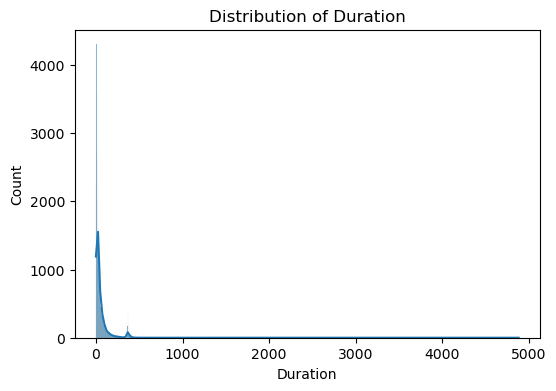

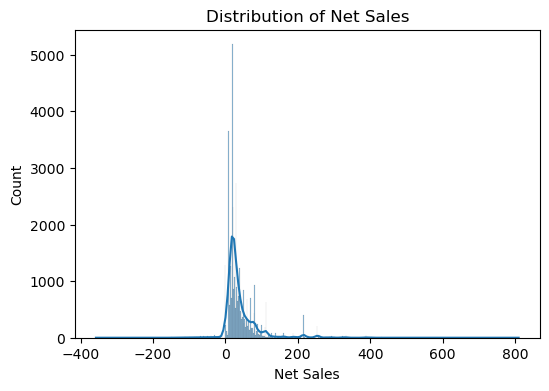

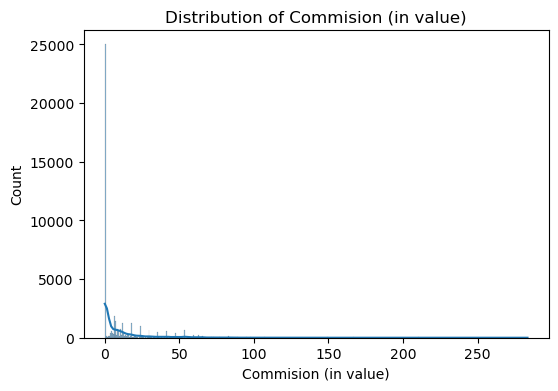

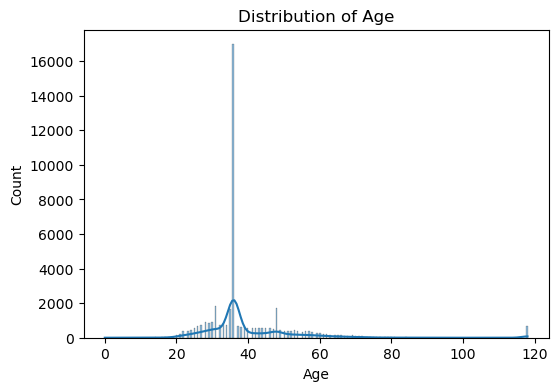

In [36]:
for i in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[i], kde=True)
    plt.title(f"Distribution of {i}")
    plt.show()

In [37]:
# Categorical Columns #
cat_cols = df.select_dtypes(include = 'object').columns
cat_cols

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Gender', 'Destination', 'Claim'],
      dtype='object')

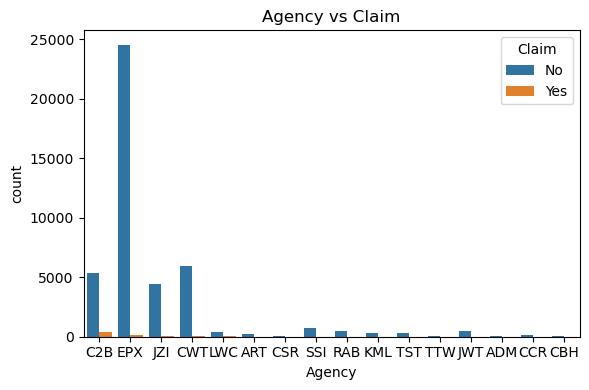

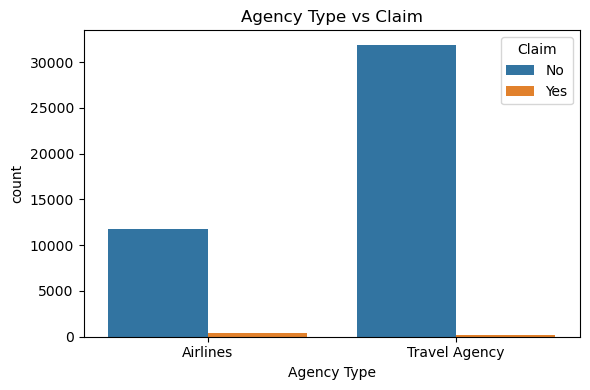

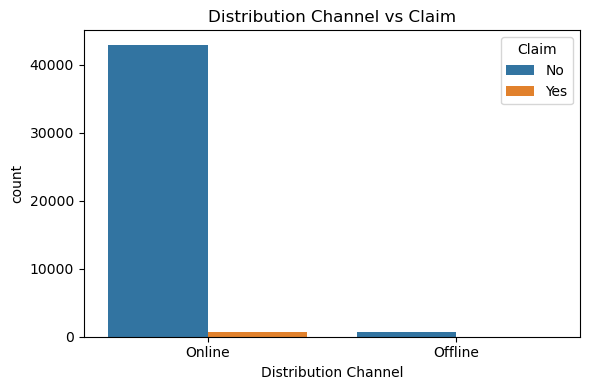

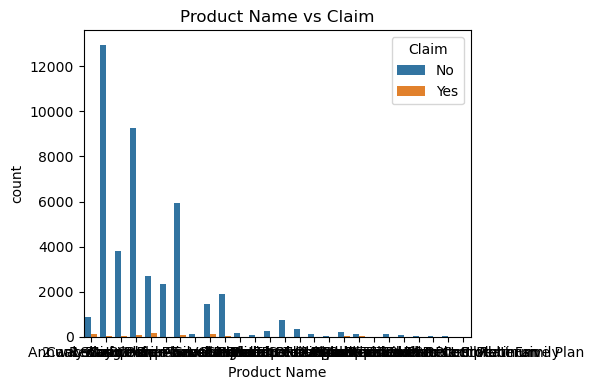

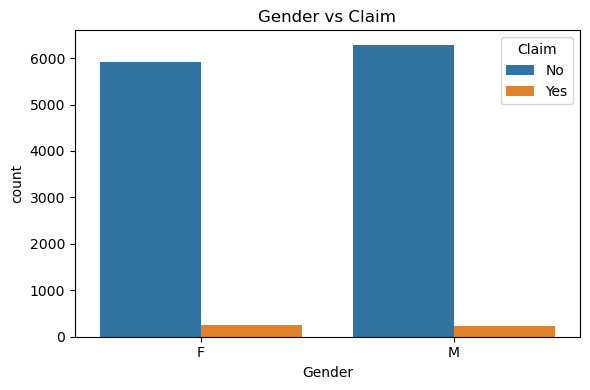

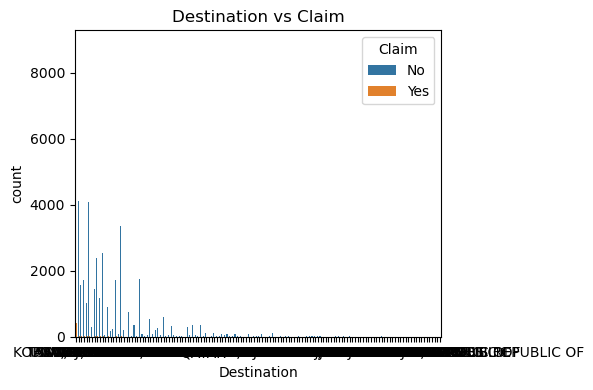

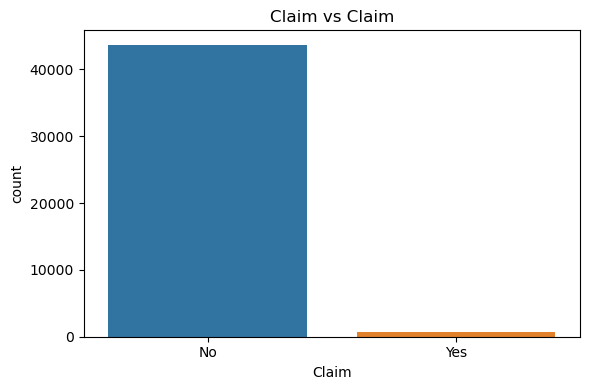

In [38]:
for i in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=i, hue='Claim', data=df)
    plt.title(f'{i} vs Claim')
    plt.tight_layout()
    plt.show()

In [39]:
df['Product Name'].nunique()

26

In [40]:
df['Destination'].nunique()

138

### Bivariate Analysis

##### Correlation Analysis

###### Claim Vs. Numerical Columns

In [44]:
num_cols

Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object')

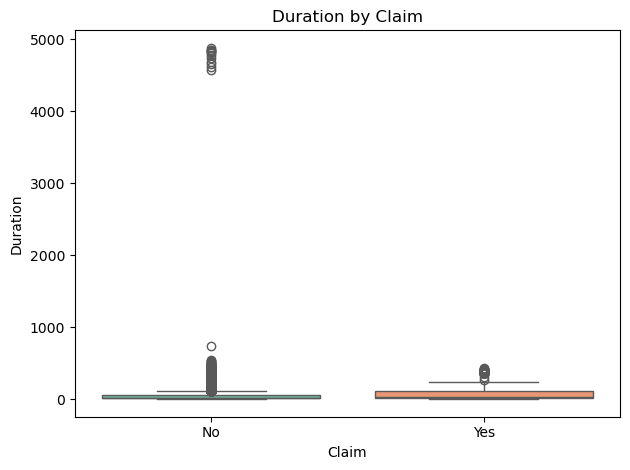

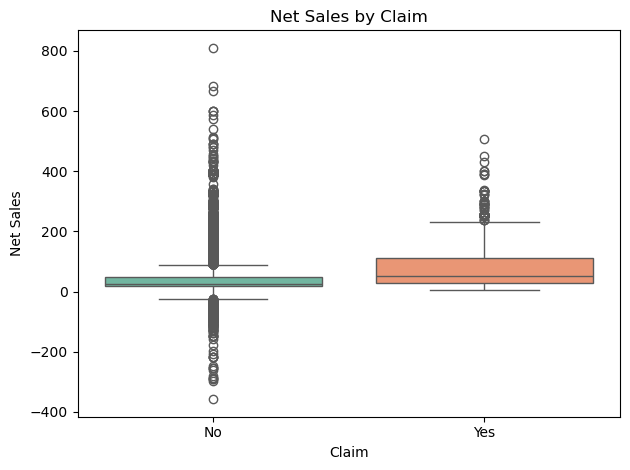

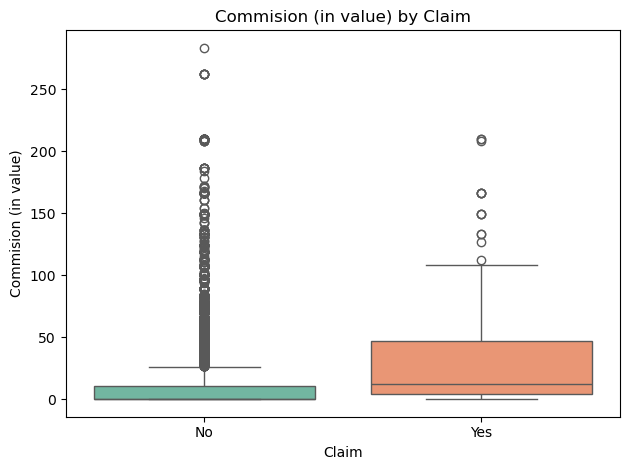

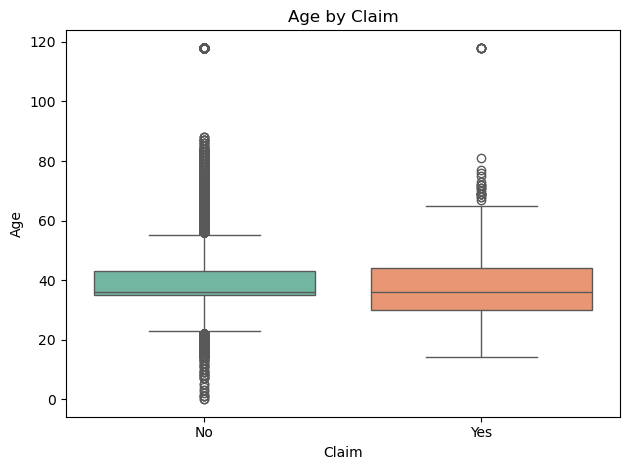

In [45]:
for i in num_cols:
    sns.boxplot(x = 'Claim', y = i, data = df, palette = 'Set2', hue = 'Claim')
    plt.title(f'{i} by Claim')
    plt.tight_layout()
    plt.show()

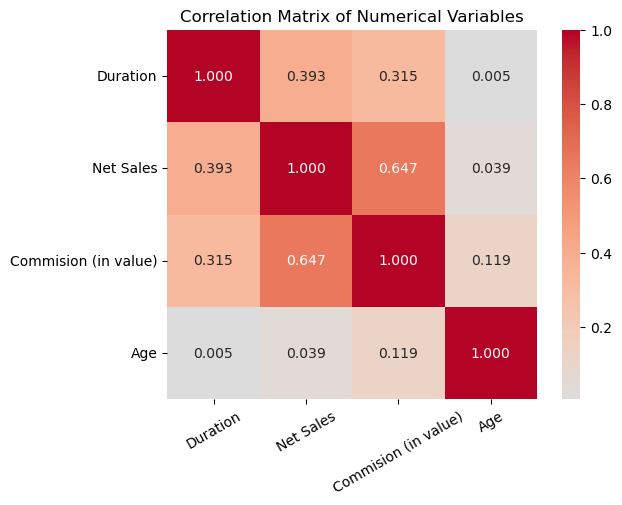

In [46]:
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, square=True, fmt=".3f")
plt.title("Correlation Matrix of Numerical Variables")
plt.xticks(rotation = 30)
plt.show()

##### Claim Vs. Categorical Columns

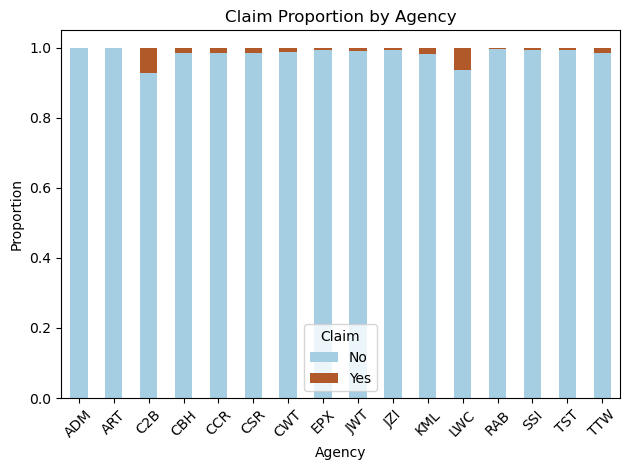

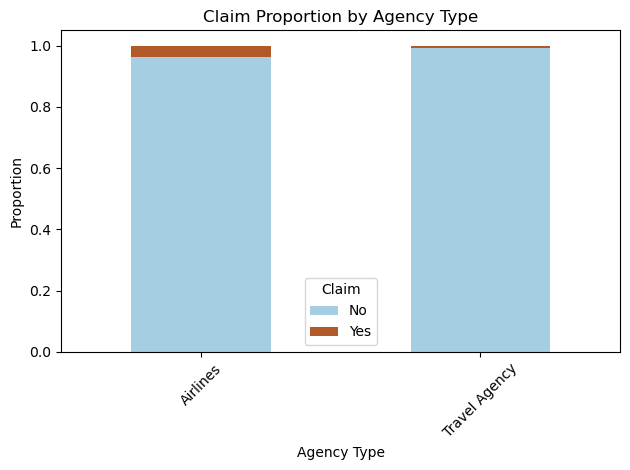

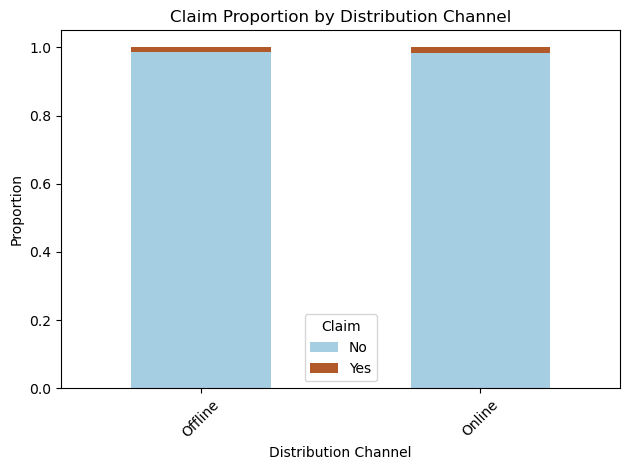

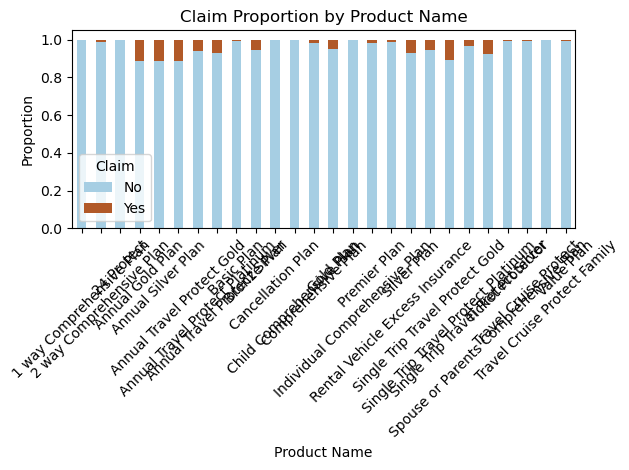

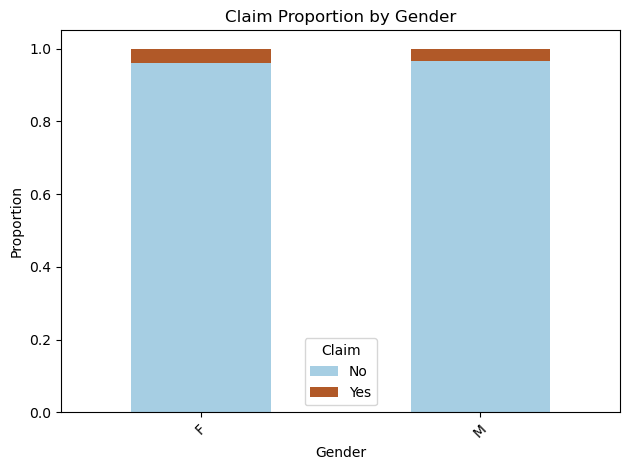

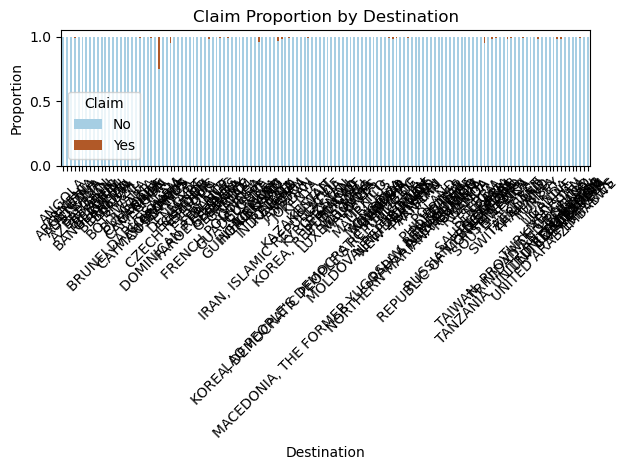

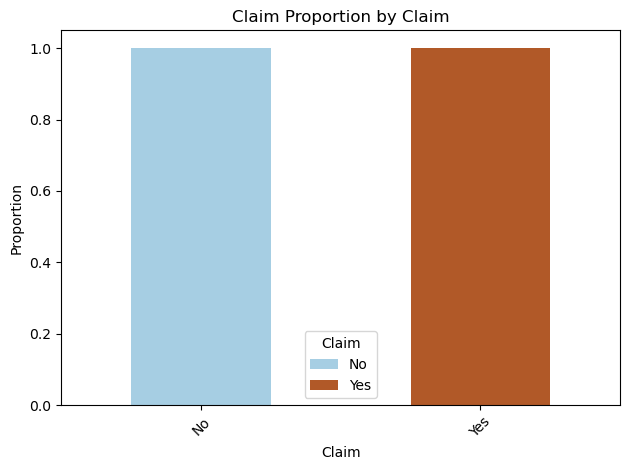

In [48]:
# Calculate correlation matrix numerical columns #
for i in cat_cols:
    claim_counts = pd.crosstab(df[i], df["Claim"], normalize="index")
    claim_counts.plot(kind="bar", stacked=True, colormap="Paired", ax=plt.gca())
    plt.title(f"Claim Proportion by {i}")
    plt.xticks(rotation=45)
    plt.ylabel("Proportion")
    plt.tight_layout()
    plt.show()

#### Destination Claim Check

- 0 : No Claim
- 1 : Claim

In [50]:
pd.set_option('display.max_rows', None)
destination_claim = (df.groupby(['Destination', 'Claim']).size().unstack(fill_value = 0).reset_index())
destination_claim['Claim Rate (%)'] = destination_claim['Yes'] / (destination_claim['No'] + destination_claim['Yes']) * 100
destination_claim = destination_claim.sort_values(by = 'Claim Rate (%)', ascending = False).reset_index()
destination_claim = destination_claim.drop(columns = ['index'])
destination_claim.index.name = 'Claim'
destination_claim

Claim,Destination,No,Yes,Claim Rate (%)
Claim,,,,
0,COSTA RICA,3,1,25.000000
1,CZECH REPUBLIC,41,2,4.651163
2,SINGAPORE,8850,417,4.499838
3,ICELAND,76,3,3.797468
4,ISRAEL,32,1,3.030303
5,ITALY,310,6,1.898734
6,TURKEY,54,1,1.818182
7,SOUTH AFRICA,111,2,1.769912
8,FRANCE,335,6,1.759531


In [51]:
pd.reset_option('display.max_rows')

#### Target Distribution

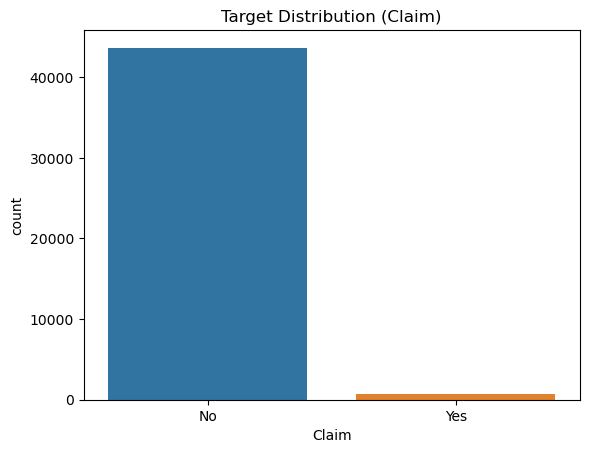

In [53]:
sns.countplot(x='Claim', data=df, hue = 'Claim')
plt.title("Target Distribution (Claim)")
plt.show()

In [54]:
# Count of each class #
print(df['Claim'].value_counts())

# Percentage of each class #
print(df['Claim'].value_counts(normalize=True) * 100)

Claim
No     43651
Yes      677
Name: count, dtype: int64
Claim
No     98.472749
Yes     1.527251
Name: proportion, dtype: float64


## Metric Evaluation

### Confusion Matrix Explanation  

|                       | Predicted: No Claim (0) | Predicted: Claim (1) |
|-----------------------|--------------------------|-----------------------|
| **Actual: No Claim (0)** | **TN** – Correctly predicted no claim | **FP** – Predicted claim, but actually no claim |
| **Actual: Claim (1)**    | **FN** – Missed an actual claim | **TP** – Correctly predicted claim |

---

### Metrics (in terms of Confusion Matrix)

- **Accuracy** = (TP + TN) / (TP + TN + FP + FN)  
- **Precision** = TP / (TP + FP) → of all predicted claims, how many are correct  
- **Recall (Sensitivity / TPR)** = TP / (TP + FN) → of all actual claims, how many are caught  
- **F1-score** = 2 × (Precision × Recall) / (Precision + Recall) → harmonic mean of Precision & Recall  
- **Specificity (TNR)** = TN / (TN + FP) → of all actual no-claims, how many are correctly identified  
- **ROC-AUC** → plots TPR vs. FPR across thresholds  
  - **TPR (Recall)** = TP / (TP + FN)  
  - **FPR** = FP / (FP + TN)  

---

### Insight  
- With imbalanced data (~98% No Claim, ~2% Claim), high **Accuracy** can still mean the model misses all claims (TP = 0).  
- That’s why we focus on **Recall, Precision, F1, and ROC-AUC** to evaluate the model fairly.

### Reason

- Recall (TP / (TP + FN))
  - Measures how many actual claims the model successfully catches.
  - Important because missing a claim (FN) can be very costly for insurers.
  - High Recall ensures we don’t overlook too many risky cases.

- Precision (TP / (TP + FP))
  - Measures how many of the predicted claims are actually true.
  - Important because too many false positives (FP) would waste resources investigating/paying attention to customers who won’t claim.

- F1-score (harmonic mean of Precision & Recall)
  - Balances the trade-off between Precision and Recall.
  - Useful when we care about both catching claims and avoiding too many false alarms.

- ROC-AUC / PR-AUC
  - Measures the model’s ability to distinguish between Claim and No Claim across different thresholds.
  - ROC-AUC is good for overall separability, while PR-AUC is better for imbalanced datasets.
  
**Chosen Metrics:** **Recall, Precision, F1-Score, and ROC-AUC** instead of Accuracy because the dataset is highly imbalanced (≈98% No Claim vs 2% Claim).  
- **Recall** ensures actual claims are not missed (low FN).  
- **Precision** ensures predicted claims are meaningful (low FP).  
- **F1-Score** balances Recall and Precision.  
- **ROC-AUC** evaluates overall model separability across thresholds.  


## Data Cleaning
---
In this section, we handle missing values, outliers, and prepare the target variable.

- **Missing Values:**  
  - `Gender` has many missing values (~70%). We fill them with `"Unknown"` to avoid data loss.  

- **Outliers:**  
  - `Duration`: Cap at 365 days (trips longer than a year are unrealistic).  
  - `Net Sales` and `Commision (in value)`: Cap outliers using the Interquartile Range (IQR) method.  
  - `Age`: Cap at 100 (values above this are unrealistic).  

- **Target Encoding:**  
  - Encode `Claim`: `Yes` → 1, `No` → 0.  

## Data Cleaning

In [59]:
# Handling Missing Values #
df['Gender'] = df['Gender'].fillna('Unknown')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                44328 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


### Handling Outlier

Explain assumptions

In [63]:
# Handling Outlier #
import numpy as np

# Duration #
df['Duration'] = np.where(df['Duration'] > 365, 365, df['Duration'])

# Net Sales and Commission #
for i in ['Net Sales', 'Commision (in value)']:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    low_cap = Q1 - 1.5 * IQR
    high_cap = Q3 + 1.5 * IQR
    df[i] = np.where(df[i] > high_cap, high_cap,
                    np.where(df[i] < low_cap, low_cap, df[i]))

# Age Cap #
df['Age'] = np.where(df['Age'] > 100, 100, df['Age'])

# Encode Claim #
df['Claim'] = df['Claim'].map({'Yes': 1, 'No': 0})

df 

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,93.0,28.875,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,Unknown,4,MALAYSIA,10.0,0.000,33,0
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.700,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,Unknown,20,UNITED STATES,93.0,0.000,59,0
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.000,28,0
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,Unknown,14,CHINA,30.0,0.000,36,1
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Unknown,17,AUSTRALIA,79.2,28.875,47,0
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.500,50,0
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,Unknown,51,CHINA,36.0,0.000,36,0


## Feature Engineering
---
In this step, we prepare the dataset for modeling:

- **Feature Split:**
  - num_cols: Duration, Net Sales, Commision (in value), Age
  - cat_cols: Agency, Agency Type, Distribution Channel, Product Name, Gender, Destination

- **Encoding & Scaling Strategy:**
  - Numerical: impute (median) + StandardScaler
  - Categorical: impute (most frequent) + OneHotEncoder

In [65]:
num_cols = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']

In [66]:
# Checking Missing Value in num_cols #
num_missing = df[num_cols].isnull().sum()
num_missing

Duration                0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

In [67]:
cat_cols = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Gender', 'Destination']
cat_cols

['Agency',
 'Agency Type',
 'Distribution Channel',
 'Product Name',
 'Gender',
 'Destination']

In [68]:
# Check Missing Values in cat_cols #
cat_missing = df[cat_cols].isnull().sum()
cat_missing

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Gender                  0
Destination             0
dtype: int64

## Train Test Split

In [70]:
from sklearn.model_selection import train_test_split
# Feature and Target #
X = df.drop(columns = 'Claim')
y = df['Claim']

# Train Test Split #
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y
                                                   )

### Column Transformer

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [73]:
# Numeric Transformer #
num_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Categorical Transformer #
cat_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine Transformers #
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols)
    ]
)

preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


---

## Modeling

Feedback:
- Explain the assumptions
- Use SKFold

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

In [78]:
# Define Models #
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [79]:
# Cross Validation Scheme #
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [80]:
# Scorer, focus on 1 (Claimed) #

recall_pos = make_scorer(recall_score, pos_label = 1)
precision_pos = make_scorer(precision_score, pos_label = 1)
f1_pos = make_scorer(f1_score, pos_label = 1)
roc_auc = 'roc_auc'

# Scoring #
scoring = {
    "precision": precision_pos,
    "recall": recall_pos,
    "f1": f1_pos,
    "roc_auc": roc_auc
}

print("X_train shape:", X_train.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))

X_train shape: (35462, 10)
y_train distribution:
 Claim
0    0.984716
1    0.015284
Name: proportion, dtype: float64


In [81]:
results = []

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    precision_score = cross_val_score(pipe, X_train, y_train, cv=skf, scoring=precision_pos)
    recall_score    = cross_val_score(pipe, X_train, y_train, cv=skf, scoring=recall_pos)
    f1_score        = cross_val_score(pipe, X_train, y_train, cv=skf, scoring=f1_pos)
    roc_auc_score   = cross_val_score(pipe, X_train, y_train, cv=skf, scoring=roc_auc)

    results.append({
        "Model": name,
        "Precision": precision_score.mean(),
        "Recall": recall_score.mean(),
        "F1": f1_score.mean(),
        "ROC-AUC": roc_auc_score.mean()
    })

df_results = pd.DataFrame(results).set_index("Model")
display(df_results.sort_values(by="ROC-AUC", ascending=False))

,Precision,Recall,F1,ROC-AUC
Model,,,,
Logistic Regression,0.000000,0.000000,0.00000,0.822221
XGBoost,0.000000,0.000000,0.00000,0.792336
Support Vector Machine,0.000000,0.000000,0.00000,0.684020
Random Forest,0.027149,0.003687,0.00648,0.674844
K-Nearest Neighbors,0.040000,0.001852,0.00354,0.573237


**INSIGHT**

- Precision, Recall, F1 for Logistic Regression, XGBoost, SVM are predicting all 0 (no claims) despite scorer specifically request for positive claim.
- ROC-AUC looks okay, meaning the model is able to separate positive from negative.

**Next Step**

Handling imbalance using SMOTE

## Handling Imbalance using SMOTE

In [84]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [90]:
result_smote = []

for name, model in models.items():
    imb_pipe = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state = 42)),
        ('classifier', model)
    ])

    cv = cross_validate(imb_pipe, X_train, y_train, cv=skf, scoring=scoring, n_jobs=-1)

    result_smote.append({
        "Model": name,
        "Precision": cv["test_precision"].mean(),
        "Recall": cv["test_recall"].mean(),
        "F1": cv["test_f1"].mean(),
        "ROC-AUC": cv["test_roc_auc"].mean()
    })

df_smote = pd.DataFrame(result_smote).set_index('Model')
display(df_smote.sort_values('ROC-AUC', ascending = False))

,Precision,Recall,F1,ROC-AUC
Model,,,,
Logistic Regression,0.051156,0.719589,0.095517,0.805772
XGBoost,0.074042,0.363337,0.122852,0.800467
Support Vector Machine,0.055648,0.667890,0.102728,0.782685
Random Forest,0.061417,0.116157,0.080245,0.711864
K-Nearest Neighbors,0.041883,0.287819,0.073105,0.640740


**INSIGHT**

- Logistic Regression has the highest recall, which indicate that the model is able to catch most of the positive claims, however, this result in low precision.
- XGBoost have the highest precision
- SVM have decent ROC-AUC, amongst the top 3

**TOP MODEL CANDIDATE:** Logistric Regression, XGBoost, SVM

**Next step**: Hyperparameter Tuning top model candidate

---

## Hyperparameter Tuning

In [91]:
# Logistic Regression #

from sklearn.model_selection import GridSearchCV

logreg_pipe = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state = 42)),
    ('classifier', LogisticRegression(max_iter = 1000, solver = 'saga'))
])

param_grid_lr = {
    "classifier__C": [0.01, 0.1, 1, 10],
    "classifier__penalty": ["l1", "l2", "elasticnet"],
    "classifier__solver": ["saga"]  # supports l1 & elasticnet
}

# GridSearch Cross Validation Setup #
grid_log = GridSearchCV(
    estimator=logreg_pipe,
    param_grid=param_grid_lr,
    cv=skf,
    scoring='recall',
    n_jobs=-1,
    verbose=2
)

# Fit model #
grid_log.fit(X_train, y_train)

# Best parameters & score
print("Best Params (Logistic Regression):", grid_log.best_params_)
print("Best Recall (Logistic Regression):", grid_log.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Params (Logistic Regression): {'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Recall (Logistic Regression): 0.7287291879034997


In [92]:
# XGBoost #

from xgboost import XGBClassifier

# Define Pipeline #
xgb_pipe = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state = 42)),
    ('classifier', XGBClassifier(random_state = 42))
])

# Define parameter grid #
param_grid_xgb = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0],
    'classifier__scale_pos_weight': [10, 20, 50]  # imbalance handling
}

# Grid search #
grid_xgb = GridSearchCV(
    xgb_pipe,
    param_grid=param_grid_xgb,
    cv=skf,
    scoring='recall',
    n_jobs=-1,
    verbose=2
)

# Fit #
grid_xgb.fit(X_train, y_train)

print("Best Params (XGBoost):", grid_xgb.best_params_)
print("Best Recall (XGBoost):", grid_xgb.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Params (XGBoost): {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__scale_pos_weight': 20, 'classifier__subsample': 0.8}
Best Recall (XGBoost): 0.9981481481481481


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV


# Define pipeline #
svm_pipe = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(probability=True, random_state=42))
])

# Define parameter grid #
param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear'],      # only linear for speed #
    'classifier__class_weight': [None, 'balanced']
}

random_svm = RandomizedSearchCV( # Use RandomizedSearch for faster result generating #
    svm_pipe,
    param_distributions = param_grid_svm,
    n_iter = 3,
    cv = 2,
    scoring = 'recall',
    n_jobs = 1,
    verbose = 2,
    random_state = 42
)

# Fit #
random_svm.fit(X_train, y_train)

print("Best Params (SVM):", random_svm.best_params_)
print("Best Recall (SVM):", random_svm.best_score_)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] END classifier__C=0.1, classifier__class_weight=None, classifier__kernel=linear; total time= 2.4min
[CV] END classifier__C=0.1, classifier__class_weight=None, classifier__kernel=linear; total time= 2.6min
[CV] END classifier__C=0.1, classifier__class_weight=balanced, classifier__kernel=linear; total time= 2.3min
[CV] END classifier__C=0.1, classifier__class_weight=balanced, classifier__kernel=linear; total time= 2.8min
[CV] END classifier__C=10, classifier__class_weight=balanced, classifier__kernel=linear; total time=32.3min
[CV] END classifier__C=10, classifier__class_weight=balanced, classifier__kernel=linear; total time=33.7min
